In [2]:
import os
import ssl
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

# This restores the same behavior as before.
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
root_file = os.path.abspath('')
root_file

'/Users/thaihoc/Desktop/gan_machine_learning'

In [4]:
mnist = input_data.read_data_sets("MNIST/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST/t10k-images-idx3-ubyte.gz
Extracting MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


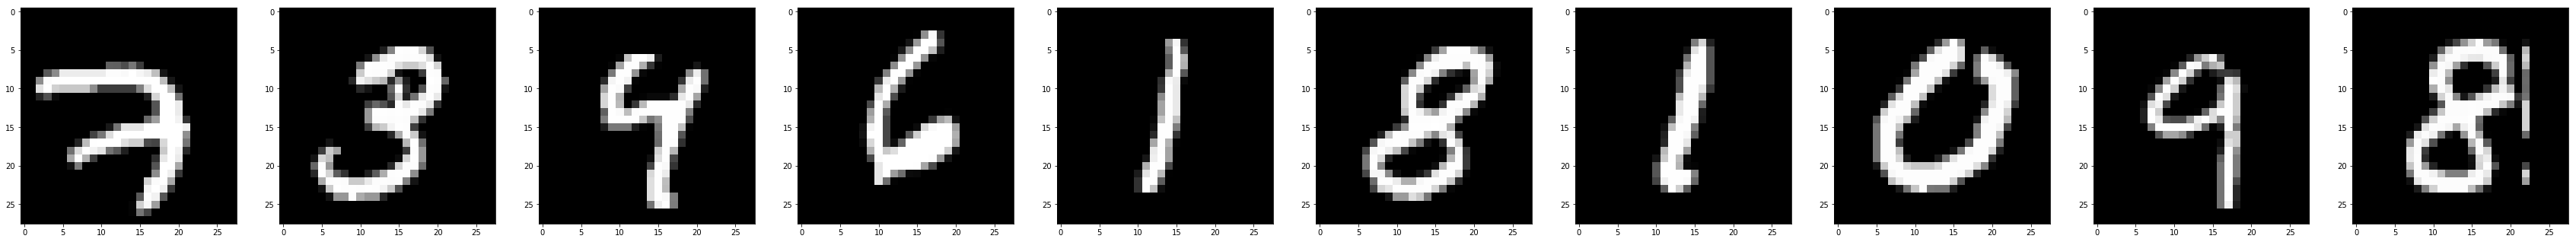

In [5]:
image = mnist.train.images
fig = plt.figure()
cols = 1
each_col = 10 
n_images = cols * each_col
for index in range(0, n_images):
    image_plt = np.reshape(image[index], (28, 28)) * 255
    mnist_image = fig.add_subplot(cols, each_col, index + 1)
    plt.imshow(image_plt, cmap='gray')
fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
plt.show()

In [6]:
def draw_image_noise():
    n = 6
    canvas = np.empty((28 * n, 28 * n))
    for i in range(n):
        z = np.random.uniform(-1., 1., size=[n, dimension_noise])
        g = sess.run(gen_out, feed_dict={random_input: z})
        g = -1 * (g - 1)
        for j in range(n):
            canvas[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])
    plt.figure(figsize=(n, n))
    plt.imshow(canvas, origin="upper", cmap="gray")
    plt.show()

In [7]:
# NN architecture
class Generator:
    def __init__(self, random_dim):
        self.weight_init = tf.truncated_normal_initializer(stddev=1e-4)
        self.bias_init = tf.zeros_initializer()
        self.dim_random = random_dim
        self.weight_variable_1 = tf.get_variable('weight_variable_gen_1', initializer=self.weight_init, shape=(self.dim_random, 256))
        self.bias_variable_1 = tf.get_variable('bias_variable_gen_1', initializer=self.bias_init, shape=(256))
        self.weight_variable_2 = tf.get_variable('weight_variable_gen_2', initializer=self.weight_init, shape=(256, 784))
        self.bias_variable_2 = tf.get_variable('bias_variable_gen_2', initializer=self.bias_init, shape=(784))
    def generator_image(self, input_noise):
        # fully connected 
        fc_1_gen = tf.add(tf.matmul(input_noise, self.weight_variable_1), self.bias_variable_1)
        fc_1_gen = tf.nn.relu(fc_1_gen)
        
        fc_2_gen = tf.add(tf.matmul(fc_1_gen, self.weight_variable_2), self.bias_variable_2)
        fc_2_gen = tf.nn.sigmoid(fc_2_gen)
        return fc_2_gen
    def return_variable(self):
        return [self.weight_variable_1, self.weight_variable_2, self.bias_variable_1, self.bias_variable_2]
    
    def return_variable_scope(self, name='Generator_model_root'):
        t_vars = tf.trainable_variables()
        g_vars = [var for var in t_vars if name in var.name]
        return g_vars

In [ ]:
class Generator_dc:
    def __init__(self, random_dimension):
        self.weight_init = tf.truncated_normal_initializer(stddev=2e-4)
        self.bias = tf.zeros_initializer()
        self.noise_dim = random_dimension
        
        # setup conv layer https://github.com/znxlwm/tensorflow-MNIST-GAN-DCGAN
        self.shape_reshape = (1, 1, 100)
        
        self.shape_conv1 = {'output': 1024, 'kernel_size': [4, 4], 
                            'strides': (2, 2), 'padding': 'SAME'}
        
        self.shape_conv2 = {'output': 512, 'kernel_size': [4, 4], 
                            'strides': (2, 2), 'padding': 'SAME'}
        
        self.shape_conv3 = {'output': 256, 'kernel_size': [4, 4], 
                            'strides': (2, 2), 'padding': 'SAME'}
        
        self.shape_conv4 = {'output': 128, 'kernel_size': [4, 4], 
                            'strides': (2, 2), 'padding': 'SAME'}
        
        self.shape_conv5 = {'output': 1, 'kernel_size': [4, 4], 
                            'strides': (2, 2), 'padding': 'SAME'}
        # ----------------
        
        self.weight_variable_1 = tf.get_variable("weight_variable_gen_1", 
                                                 initializer=self.weight_init, 
                                                 shape=[self.noise_dim, self.shape_reshape[0] * self.shape_reshape[1] * self.shape_reshape[2]])
        
        self.bias_variable_1 = tf.get_variable("bias_variable_gen_1",
                                               initializer=self.bias,
                                               shape=[self.shape_reshape[0] * self.shape_reshape[1] * self.shape_reshape[2]])
        
    def generator_image(self, noise_image, momentum=0.2, isTrain=True):
        # we create a CNN 
        # input: [None, 100] ==(reshape)=> [None, 4, 4, 512]
        net = tf.add(tf.matmul(noise_image, self.weight_variable_1), self.bias_variable_1)
        net = tf.nn.relu(net)
        net = tf.reshape(net, shape=[-1, self.shape_reshape[0], self.shape_reshape[1], self.shape_reshape[2]]) # start 
        
        # conv1 
        net = tf.layers.conv2d_transpose( net, 
                                          self.shape_conv1['output'], 
                                          kernel_size=self.shape_conv1['kernel_size'],
                                          strides=self.shape_conv1['strides'],
                                          padding=self.shape_conv1['padding'],
                                          name='conv_gen_1'
                                         )
        net = tf.layers.batch_normalization(net, momentum=momentum, training=isTrain)
        net = tf.nn.leaky_relu(net)
        
        # conv2
        net = tf.layers.conv2d_transpose( net, 
                                          self.shape_conv2['output'], 
                                          kernel_size=self.shape_conv2['kernel_size'],
                                          strides=self.shape_conv2['strides'],
                                          padding=self.shape_conv2['padding'],
                                          name='conv_gen_2'
                                         )
        net = tf.layers.batch_normalization(net, momentum=momentum, training=isTrain)
        net = tf.nn.leaky_relu(net)
        
        
        # conv3
        net = tf.layers.conv2d_transpose( net, 
                                          self.shape_conv3['output'], 
                                          kernel_size=self.shape_conv3['kernel_size'],
                                          strides=self.shape_conv3['strides'],
                                          padding=self.shape_conv3['padding'],
                                          name='conv_gen_3'
                                         )
        net = tf.layers.batch_normalization(net, momentum=momentum, training=isTrain)
        net = tf.nn.leaky_relu(net)
        
        # conv4
        net = tf.layers.conv2d_transpose( net, 
                                          self.shape_conv4['output'], 
                                          kernel_size=self.shape_conv4['kernel_size'],
                                          strides=self.shape_conv4['strides'],
                                          padding=self.shape_conv4['padding'],
                                          name='conv_gen_4'
                                         )
        net = tf.layers.batch_normalization(net, momentum=momentum, training=isTrain)
        net = tf.nn.leaky_relu(net)
        
        # conv5
        net = tf.layers.conv2d_transpose( net, 
                                          self.shape_conv5['output'], 
                                          kernel_size=self.shape_conv5['kernel_size'],
                                          strides=self.shape_conv5['strides'],
                                          padding=self.shape_conv5['padding'],
                                          name='conv_gen_5'
                                         )
        net = tf.nn.tanh(net)
        return net
         
        
    def return_variable_scope(self, name='Generator_model_root'):
        t_vars = tf.trainable_variables()
        g_vars = [var for var in t_vars if name in var.name]
        return g_vars
        

In [7]:
class Discriminator:
    def __init__(self):
        self.weight_init = tf.truncated_normal_initializer(stddev=1e-4)
        self.bias_init = tf.zeros_initializer()
        self.weight_variable_1 = tf.get_variable('weight_variable_dis_1', initializer=self.weight_init, shape=(784, 256))
        self.bias_variable_1 = tf.get_variable('bias_variable_dis_1', initializer=self.bias_init, shape=(256))
        self.weight_variable_2 = tf.get_variable('weight_variable_dis_2', initializer=self.weight_init, shape=(256, 1))
        self.bias_variable_2 = tf.get_variable('bias_variable_dis_2', initializer=self.bias_init, shape=(1))
            
    def prediction(self, input_image):
        # fully connected 
        fc_1_dis = tf.add(tf.matmul(input_image, self.weight_variable_1), self.bias_variable_1)
        fc_1_dis = tf.nn.relu(fc_1_dis)

        fc_2_dis = tf.add(tf.matmul(fc_1_dis, self.weight_variable_2), self.bias_variable_2)
        fc_2_dis = tf.nn.sigmoid(fc_2_dis)
        return fc_2_dis
    
    def return_variable(self):
        return [self.weight_variable_1, self.weight_variable_2, self.bias_variable_1, self.bias_variable_2]
    
    def return_variable_scope(self, name='Discriminator_model_root'):
        t_vars = tf.trainable_variables()
        d_vars = [var for var in t_vars if name in var.name]
        return d_vars

Instructions for updating:
Colocations handled automatically by placer.
Step 1: Generator Loss: 0.693147, Discriminator Loss: 1.386294


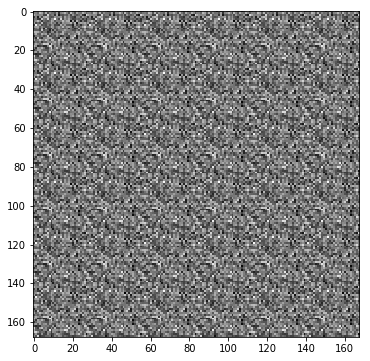

Step 2000: Generator Loss: 1.028494, Discriminator Loss: 1.136174
Step 4000: Generator Loss: 0.704050, Discriminator Loss: 1.292972
Step 6000: Generator Loss: 0.603236, Discriminator Loss: 1.594589
Step 8000: Generator Loss: 0.731799, Discriminator Loss: 1.537751
Step 10000: Generator Loss: 1.394225, Discriminator Loss: 0.733594
Step 12000: Generator Loss: 1.437677, Discriminator Loss: 0.688686
Step 14000: Generator Loss: 1.183801, Discriminator Loss: 0.833981
Step 16000: Generator Loss: 1.285587, Discriminator Loss: 0.854559
Step 18000: Generator Loss: 1.475497, Discriminator Loss: 0.590197
Step 20000: Generator Loss: 1.723998, Discriminator Loss: 0.718672


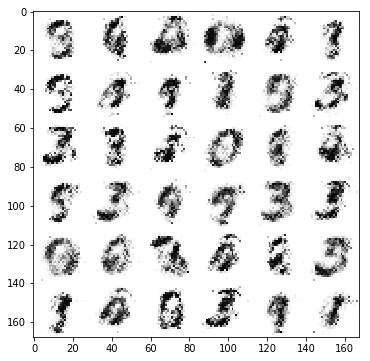

Step 22000: Generator Loss: 1.551992, Discriminator Loss: 0.740424
Step 24000: Generator Loss: 1.357933, Discriminator Loss: 0.763051
Step 26000: Generator Loss: 1.564177, Discriminator Loss: 0.923412
Step 28000: Generator Loss: 1.380065, Discriminator Loss: 0.935487
Step 30000: Generator Loss: 1.649122, Discriminator Loss: 0.938119
Step 32000: Generator Loss: 1.729898, Discriminator Loss: 0.867219
Step 34000: Generator Loss: 1.790956, Discriminator Loss: 0.787173
Step 36000: Generator Loss: 1.686240, Discriminator Loss: 0.660244
Step 38000: Generator Loss: 1.598889, Discriminator Loss: 0.756893
Step 40000: Generator Loss: 1.790745, Discriminator Loss: 0.862541


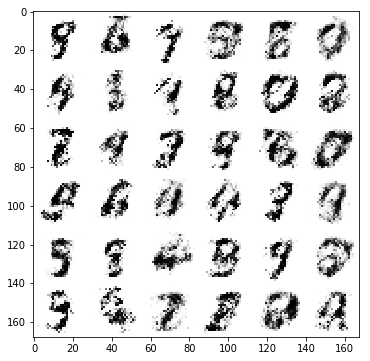

Step 42000: Generator Loss: 1.523641, Discriminator Loss: 0.735049
Step 44000: Generator Loss: 1.746804, Discriminator Loss: 0.860761
Step 46000: Generator Loss: 1.584666, Discriminator Loss: 0.901199
Step 48000: Generator Loss: 1.349591, Discriminator Loss: 1.153987
Step 50000: Generator Loss: 1.482746, Discriminator Loss: 1.110548
Step 52000: Generator Loss: 1.359255, Discriminator Loss: 0.909417
Step 54000: Generator Loss: 1.229522, Discriminator Loss: 0.962517
Step 56000: Generator Loss: 1.196657, Discriminator Loss: 1.108919
Step 58000: Generator Loss: 1.351822, Discriminator Loss: 0.907915
Step 60000: Generator Loss: 1.312791, Discriminator Loss: 0.894652


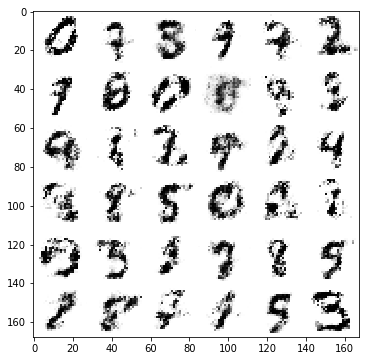

Step 62000: Generator Loss: 1.270324, Discriminator Loss: 0.871537
Step 64000: Generator Loss: 1.466004, Discriminator Loss: 0.784010
Step 66000: Generator Loss: 1.443287, Discriminator Loss: 0.912817
Step 68000: Generator Loss: 1.494754, Discriminator Loss: 0.974322
Step 70000: Generator Loss: 0.934819, Discriminator Loss: 1.266856
Step 72000: Generator Loss: 1.446050, Discriminator Loss: 0.813452
Step 74000: Generator Loss: 1.281837, Discriminator Loss: 0.925391
Step 76000: Generator Loss: 1.571114, Discriminator Loss: 0.770351
Step 78000: Generator Loss: 1.527626, Discriminator Loss: 0.804702
Step 80000: Generator Loss: 1.461610, Discriminator Loss: 0.878296


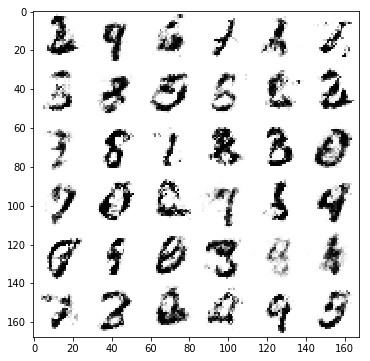

Step 82000: Generator Loss: 1.774737, Discriminator Loss: 0.757764
Step 84000: Generator Loss: 0.893804, Discriminator Loss: 1.324397
Step 86000: Generator Loss: 1.724792, Discriminator Loss: 0.790292
Step 88000: Generator Loss: 1.620713, Discriminator Loss: 0.978352
Step 90000: Generator Loss: 1.525514, Discriminator Loss: 0.803670
Step 92000: Generator Loss: 1.806715, Discriminator Loss: 0.839268
Step 94000: Generator Loss: 1.396036, Discriminator Loss: 0.883764
Step 96000: Generator Loss: 1.059883, Discriminator Loss: 1.604174
Step 98000: Generator Loss: 1.808016, Discriminator Loss: 0.775789
Finished!


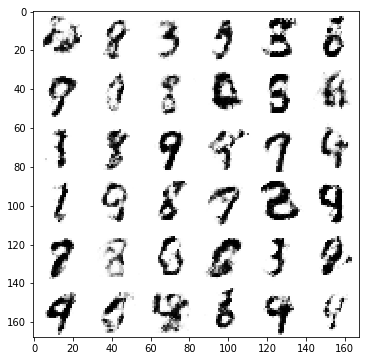

In [8]:
# GAN
dimension_noise = 100
batch_size = 100
loss_gen_arr = []
loss_disc_arr = []

with tf.Graph().as_default() as graph:
    # we init my input
    with tf.variable_scope("input_real"):
        input_image = tf.placeholder(tf.float32, shape=[None, 784])
        
    with tf.variable_scope("input_noise"):
        random_input = tf.placeholder(tf.float32, shape=[None, dimension_noise], name='rand_input')
    
    with tf.variable_scope("Generator_model_root"):
        generator_class = Generator(dimension_noise)
        gen_out = generator_class.generator_image(random_input)

    with tf.variable_scope("Discriminator_model_root"):
        discriminator_class = Discriminator()
        real_image_pre = discriminator_class.prediction(input_image)
        fake_image_pre = discriminator_class.prediction(gen_out)

    # init create loss function 
    with tf.variable_scope("loss_generator"):
        loss_generator = -tf.reduce_mean(tf.log(fake_image_pre))
        
    with tf.variable_scope("loss_discriminator"):
        loss_discriminator = -tf.reduce_mean( tf.log(real_image_pre) + tf.log(1. - fake_image_pre))
        
    # create optimizers
    optimizer_model = tf.train.AdamOptimizer(learning_rate=0.0002)

    # get variable_scope vs or something .....
    var_generator = generator_class.return_variable_scope()
    var_discriminator = discriminator_class.return_variable_scope()

    # get variable of generator back_propo
    traing_gen = optimizer_model.minimize(loss_generator, var_list=var_generator)
    training_dis = optimizer_model.minimize(loss_discriminator, var_list=var_discriminator)
    
    # create tensorboard
    with tf.variable_scope('information_display'):
        loss = tf.Variable(initial_value=0.0, dtype=tf.float32)
        tf.summary.scalar('loss', loss)
        tf.summary.image('image_input',  tf.reshape(input_image, [-1, 28, 28, 1]))
        tf.summary.image('image_gen',  tf.reshape(gen_out, [-1, 28, 28, 1]))
        
    summary_op = tf.summary.merge_all()
    writer_gen = tf.summary.FileWriter('./logs/gen', tf.get_default_graph())
    writer_disc = tf.summary.FileWriter('./logs/disc', tf.get_default_graph())
    
    # Initialize the variables (i.e. assign their default value)
    gpu_memory_fraction = 0.2
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_memory_fraction)
    step_init = tf.Variable(initial_value=0, dtype=tf.int32, trainable=False, name='global_step_one')
    init = tf.global_variables_initializer()
    
    with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options, log_device_placement=False)) as sess:      
        sess.run(init)
        step = step_init.eval()
        summary_disc = tf.Summary()
        for index in range(1, 100000):
            batch_x, _ = mnist.train.next_batch(batch_size=batch_size)
            noise_z = np.random.uniform(-1., 1., size=[batch_size, dimension_noise])
            _, _, loss_gen, loss_disc, gen_image = sess.run([traing_gen, training_dis, 
                                                  loss_generator, loss_discriminator, gen_out], 
                                                  feed_dict={input_image: batch_x, random_input: noise_z})
            
            summary_disc_result = sess.run(summary_op, feed_dict={loss:loss_disc, input_image: batch_x, gen_out: gen_image})
            writer_disc.add_summary(summary_disc_result, global_step=index)
            summary_gen_result = sess.run(summary_op,feed_dict={loss:loss_gen, input_image: batch_x, gen_out: gen_image})
            writer_gen.add_summary(summary_gen_result, global_step=index)
      
            if index % 2000 == 0 or index == 1:
                print('Step %i: Generator Loss: %f, Discriminator Loss: %f' % (index, loss_gen, loss_disc))
                
            if index % 20000 == 0 or index == 1:
                draw_image_noise()
            
        print("Finished!")
        draw_image_noise()

In [ ]:
# font = {
#     'family' : 'Bitstream Vera Sans',
#     'weight' : 'bold',
#     'size'   : 18
# }
# plt.rc('font', **font)

# width = 20
# height = 20
# plt.figure(figsize=(width, height))

# indep_train_axis = np.array(range(1, (len(loss_gen_arr)+1)))
# plt.plot(indep_train_axis, np.array(loss_gen_arr), "b", label="Loss Generation")
# plt.plot(indep_train_axis, np.array(loss_disc_arr), "g", label="Loss Discriminator")


# plt.title("Training session's progress over iterations")
# plt.legend(loc='upper right', shadow=True)
# plt.ylabel('Error')
# plt.xlabel('Training iteration')

In [ ]:
# ------------------------------------- DCGAN -----------------------------------

In [ ]:
with tf.Graph().as_default() as graph:
    
    with tf.variable_scope('input_real')